# Employee Attrition: Exploratory Data Analysis

#### 1. Introduction
- Brief on dataset
- Goal of the EDA

#### 2. Attrition Distribution
- Countplot + % who left

#### 3. Department-Wise Attrition
- Horizontal bar chart
- Comment on top-risk departments

#### 4. Demographic Analysis
- Age, gender, marital status
- Insights

#### 5. Job/Career Features
- Job satisfaction, role, years at company
- Promotion status

#### 6. Financial and Commute Factors
- Monthly income, overtime, distance

#### 7. Correlation Matrix
- Highlight strongly correlated variables

#### 8. Key Takeaways
- Bullet-point summary of 4–5 main findings


In [2]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/IBM.csv')

# Display the first few rows of the DataFrame
display(df.head())

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [3]:
print(df.isnull().sum())

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64


In [4]:
df.drop_duplicates()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [5]:
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


# Exploratory Data Analysis (EDA)

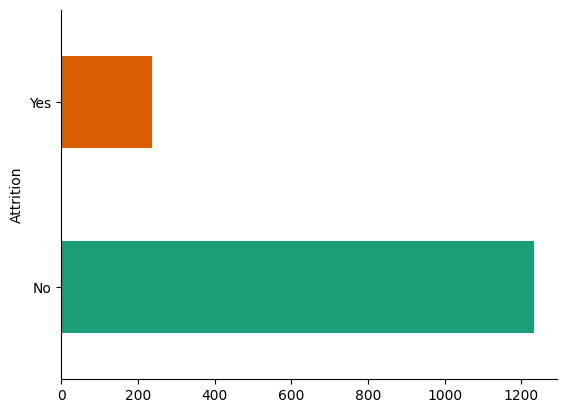

In [6]:
# @title Attrition

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Attrition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

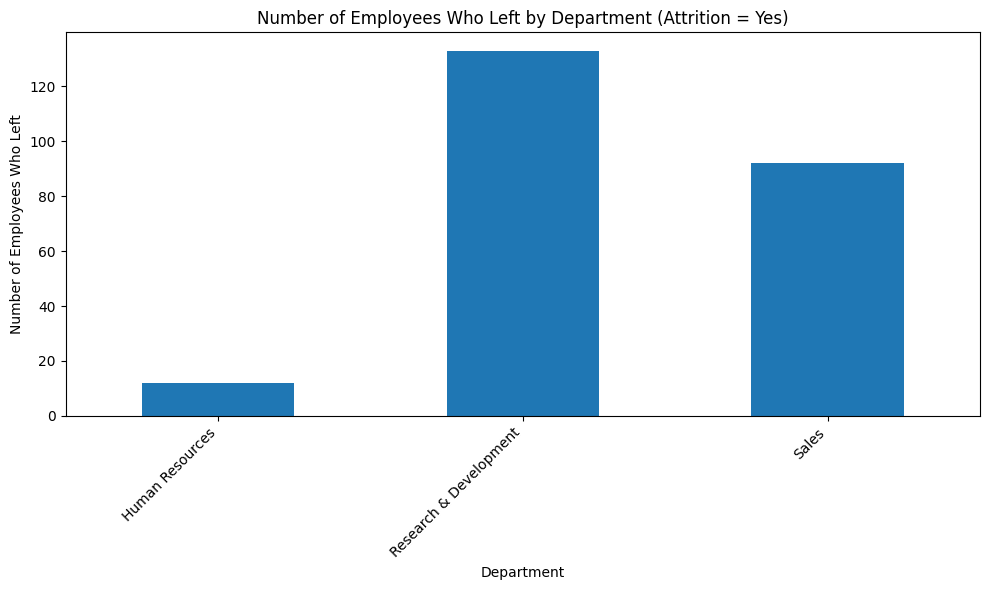

In [7]:
# @title Attrition vs Department

# Calculate the count of 'Attrition' for each 'Department'
attrition_by_department = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)

# Plot the bar chart for 'Yes' attrition
attrition_by_department['Yes'].plot(kind='bar', figsize=(10, 6))
plt.title('Number of Employees Who Left by Department (Attrition = Yes)')
plt.xlabel('Department')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

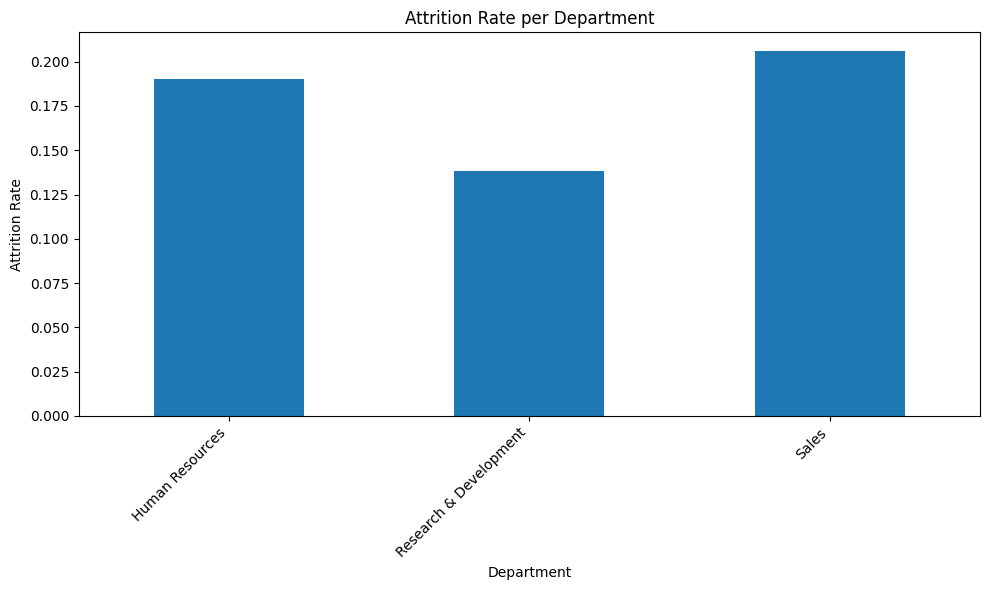

In [8]:
# @title Attrition Rate by Department

# Calculate the count of 'Attrition' for each 'Department'
attrition_by_department = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)

# Calculate the total number of employees per department
total_employees_by_department = attrition_by_department.sum(axis=1)

# Calculate the attrition rate per department
attrition_rate_by_department = attrition_by_department['Yes'] / total_employees_by_department

# Plot the attrition rate bar chart
plt.figure(figsize=(10, 6))
attrition_rate_by_department.plot(kind='bar')
plt.title('Attrition Rate per Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

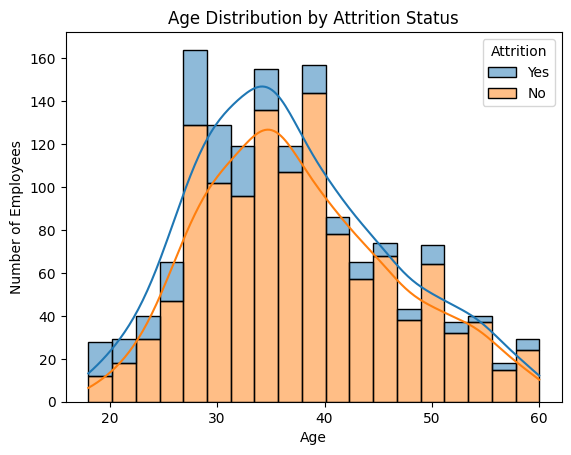

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.show()

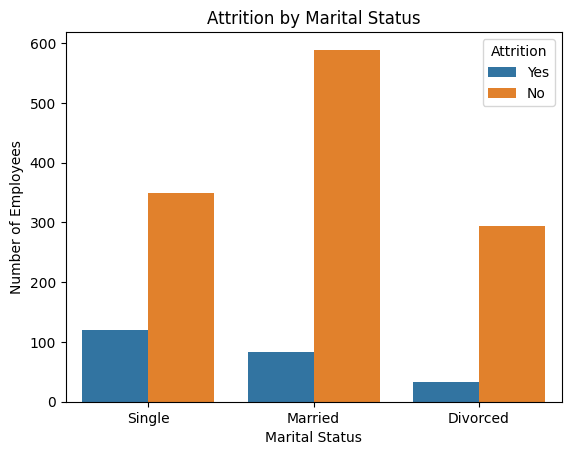

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='MaritalStatus', hue='Attrition')
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.show()

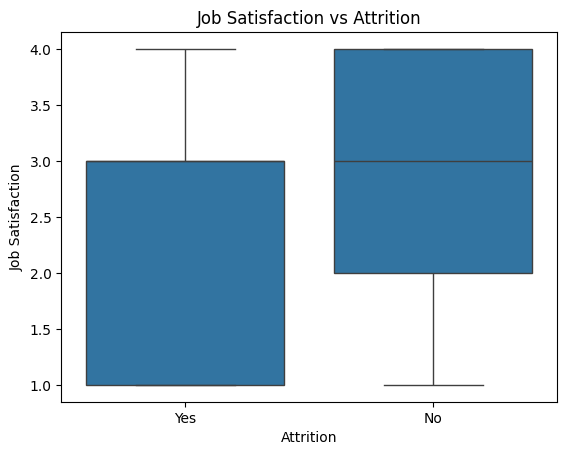

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Attrition', y='JobSatisfaction')
plt.title('Job Satisfaction vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.show()

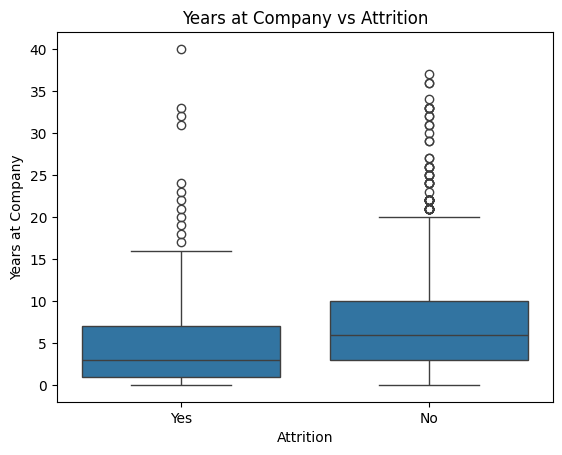

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Attrition', y='YearsAtCompany')
plt.title('Years at Company vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()

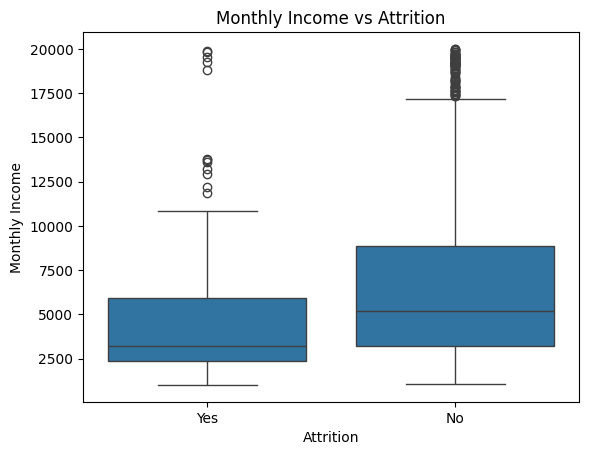

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

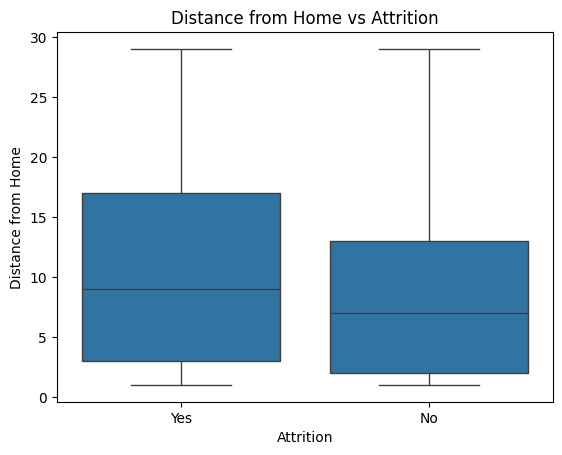

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Attrition', y='DistanceFromHome')
plt.title('Distance from Home vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Distance from Home')
plt.show()

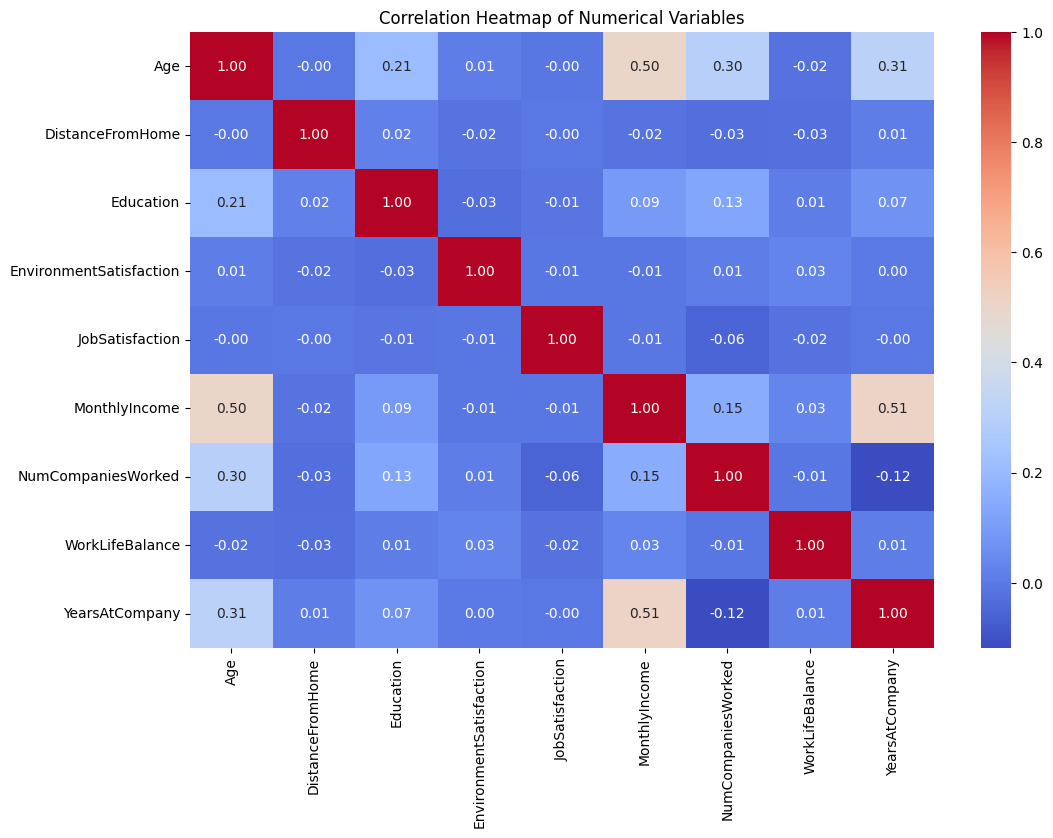

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#Summary of Findings

**Overall Attrition:** A significant number of employees have left the company.

**Department-Wise Attrition:** The Sales and Human Resources departments have higher attrition rates compared to Research & Development.

**Age and Attrition:** The age distribution shows that younger employees tend to have a higher likelihood of attrition.

**Marital Status and Attrition:** Single employees have a higher attrition rate compared to married or divorced employees.

**Job Satisfaction and Attrition:** Employees with lower job satisfaction appear to have a higher tendency to leave the company.

**Years at Company and Attrition:** Employees with fewer years at the company show a higher likelihood of attrition.

**Monthly Income and Attrition:** Employees with lower monthly incomes tend to have a higher attrition rate.

**Distance from Home and Attrition:** Employees who live further from home seem to have a slightly higher attrition rate.

**Correlation Analysis:** The correlation heatmap revealed some relationships between numerical variables, such as a positive correlation between Age and Monthly Income, and Age and Years at Company.